In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy .stats import zscore
%matplotlib inline

In [2]:
df=pd.read_csv("D:/ML Project 2_ Automobile/AutoData (1).csv")

# Perform EDA on the data

df.describe()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [7]:
df.isnull().sum()                                    #checking for null values

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Perform data cleanup as required

In [8]:
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### We can see that the car and company name are together in the "make" column. We will separate these.

In [3]:
df['company']= df['make'].apply(lambda x:x.split(' ')[0])

In [77]:
df.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [4]:
#delete the "make" column

df=df.drop(['make'], axis=1)
df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


In [12]:
df['company'].value_counts()                              #checking for total cars in each company

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: company, dtype: int64

In [5]:
# Some of the company names are repeated with spelling errors.Replacing them with the correct names.

df['company'].replace('toyouta', 'toyota',inplace=True)
df['company'].replace('Nissan', 'nissan',inplace=True)
df['company'].replace('maxda', 'mazda',inplace=True)
df['company'].replace('vokswagen', 'volkswagen',inplace=True)
df['company'].replace('vw', 'volkswagen',inplace=True)
df['company'].replace('porcshce', 'porsche',inplace=True)

In [15]:
df['company'].value_counts() 

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: company, dtype: int64

### Checking all categorical variables

In [6]:
# In "doornumber" column the numbers are in words. Change them to numeric.

def numb(x):
    return x.map({'four':4, 'two': 2})
    
df['doornumber'] = df[['doornumber']].apply(numb)

In [17]:
df['doornumber'].value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [7]:
# In "cylindernumber" column the numbers are in words. Change them to numeric.

def numn(x):
    return x.map({'eight':8, 'five':5, 'four':4, 'six':6, 'three':3, 'twelve':12,  'two': 2})
    
df['cylindernumber'] = df[['cylindernumber']].apply(numn)

In [29]:
df['cylindernumber'].value_counts()

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: cylindernumber, dtype: int64

In [18]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [19]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [20]:
df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [21]:
df['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [22]:
df['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [52]:
#creating a new dataframe "numeric_data" for all numeric variables

numeric_data = df.select_dtypes(include =['int64','float64'])
numeric_data.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


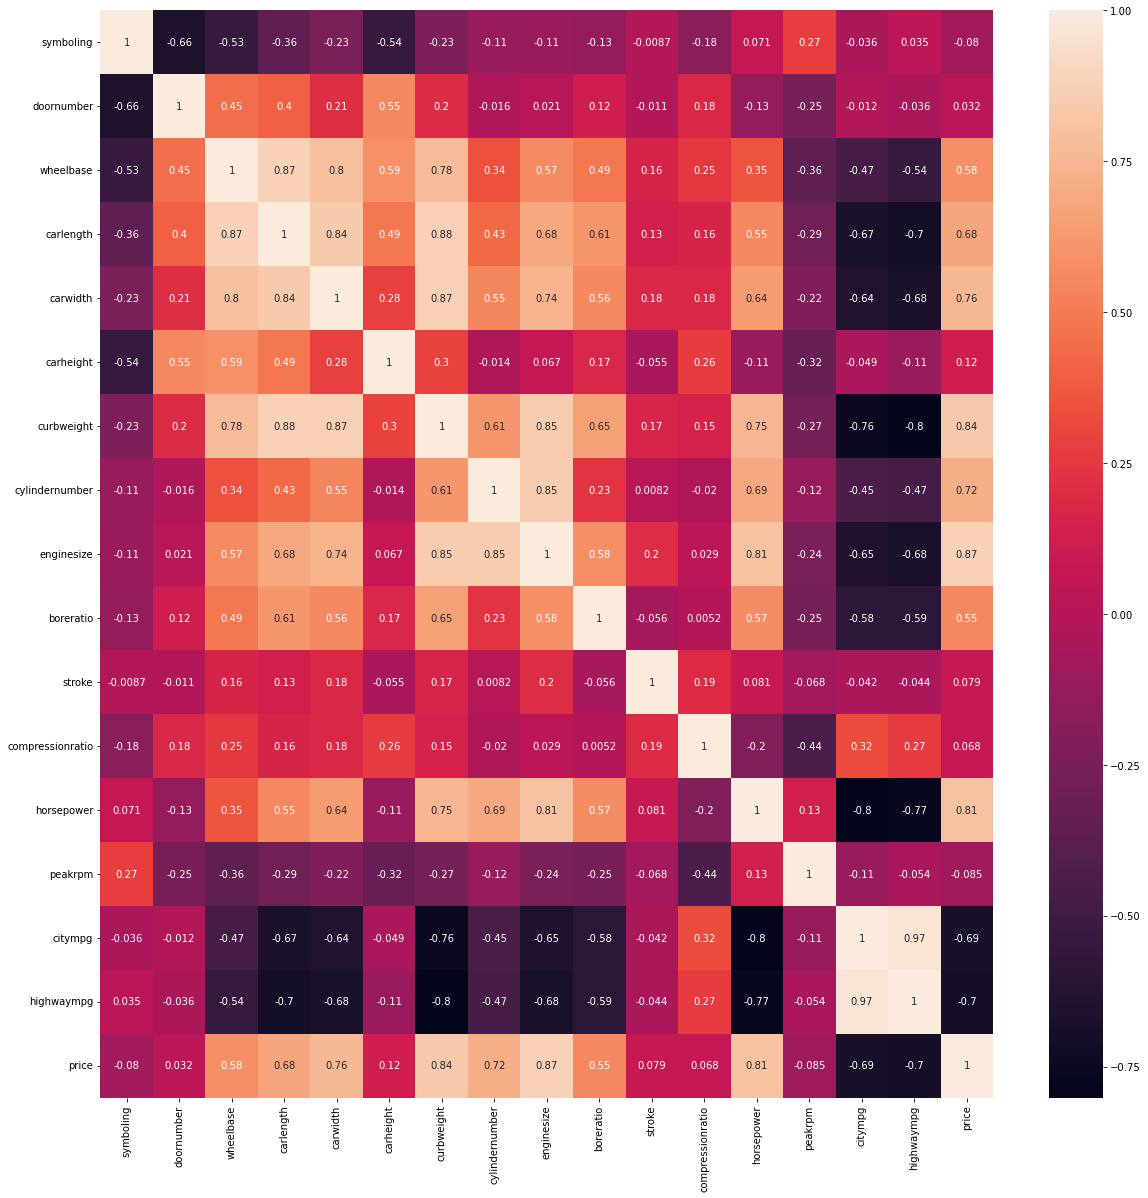

In [9]:
#checking the correlation between these variables.

plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [8]:
X = df.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength','carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber','enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg',
'company']]
y=df['price']

In [9]:
#creating a new dataframe "categ_data" for all categorical variables.

categ_data = df.select_dtypes(include = ['object'])
categ_data.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,company
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


In [10]:
df_dummies = pd.get_dummies(categ_data, drop_first = True)
df_dummies.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,company_nissan,company_peugeot,company_plymouth,company_porsche,company_renault,company_saab,company_subaru,company_toyota,company_volkswagen,company_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_new= pd.concat([df, df_dummies], axis =1)

In [12]:
df_new= df_new.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation','enginetype', 'fuelsystem', 'company'], axis =1)

In [15]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            205 non-null    int64  
 1   doornumber           205 non-null    int64  
 2   wheelbase            205 non-null    float64
 3   carlength            205 non-null    float64
 4   carwidth             205 non-null    float64
 5   carheight            205 non-null    float64
 6   curbweight           205 non-null    int64  
 7   cylindernumber       205 non-null    int64  
 8   enginesize           205 non-null    int64  
 9   boreratio            205 non-null    float64
 10  stroke               205 non-null    float64
 11  compressionratio     205 non-null    float64
 12  horsepower           205 non-null    int64  
 13  peakrpm              205 non-null    int64  
 14  citympg              205 non-null    int64  
 15  highwaympg           205 non-null    int

In [13]:
X=X.drop(columns=categ_data)
X.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22


## Perform train test split

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(143, 16) (62, 16) (143,) (62,)


In [15]:
#train the model

from sklearn.linear_model import LinearRegression
linear_reg=LinearRegression()
linear_reg.fit(X_train,y_train)

#predict y
y_pred_test=linear_reg.predict(X_test)
y_pred_train=linear_reg.predict(X_train)

In [130]:
X_train.shape

(143, 16)

In [131]:
X_test.shape

(62, 16)

## Build model using best variable and report the R2

In [16]:
#Rsqaure
from sklearn import metrics
from sklearn.metrics import r2_score

print('R-sqaure on train data: {}'.format(r2_score(y_true=y_train, y_pred=y_pred_train)))
print('R-sqaure on test data: {}'.format(r2_score(y_true=y_test, y_pred=y_pred_test)))

#Standard error/RMSE
error_train=y_pred_train-y_train
error_test=y_pred_test-y_test

print('RMSE on train data: {}'.format(((error_train**2).mean())**0.5))
print('RMSE on test data: {}'.format(((error_test**2).mean())**0.5))

R-sqaure on train data: 0.8737719394526802
R-sqaure on test data: 0.7415167033415466
RMSE on train data: 2806.8281478456465
RMSE on test data: 4131.532067747119


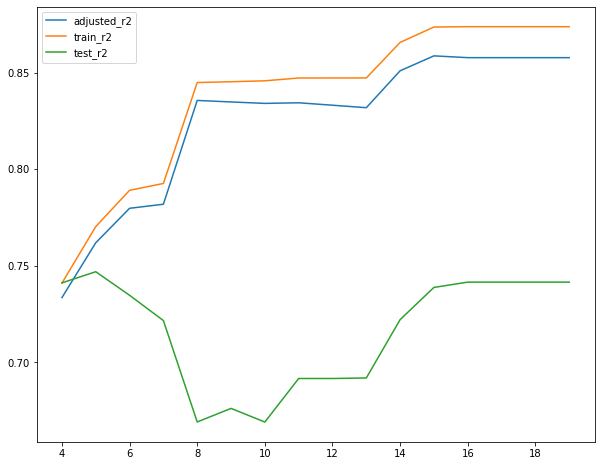

In [17]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm 
import warnings
warnings.simplefilter('ignore')

n_features_list = list(range(4, 20))
adjusted_r2 = []
r2 = []
test_r2 = []
for n_features in range(4, 20):
# RFE with n features
    lm = LinearRegression()
# specify number of features
    rfe_n = RFE(lm, n_features)
# fit with n features
    rfe_n.fit(X_train, y_train)
# subset the features selected by rfe_6
    col_n = X_train.columns[rfe_n.support_]
# subsetting training data for 6 selected columns
    X_train_rfe_n = X_train[col_n]
# add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)
# fitting the model with 6 variables
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    adjusted_r2.append(lm_n.rsquared_adj)
    r2.append(lm_n.rsquared)
    
    
    # making predictions using rfe_15 sm model
    X_test_rfe_n = X_test[col_n]
# # Adding a constant variable 
    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')
# # Making predictions
    y_pred = lm_n.predict(X_test_rfe_n)
    
    test_r2.append(r2_score(y_test, y_pred))
# plotting adjusted_r2 against n_features
plt.figure(figsize=(10, 8))
plt.plot(n_features_list, adjusted_r2, label="adjusted_r2")
plt.plot(n_features_list, r2, label="train_r2")
plt.plot(n_features_list, test_r2, label="test_r2")
plt.legend(loc='upper left')
plt.show()

In [135]:
# RFE with n features
lm = LinearRegression()
n_features = 5
# specify number of features
rfe_n = RFE(lm, n_features)
# fit with n features
rfe_n.fit(X_train, y_train)
# subset the features selected by rfe_6
col_n = X_train.columns[rfe_n.support_]
# subsetting training data for 6 selected columns
X_train_rfe_n = X_train[col_n]
# add a constant to the model
X_train_rfe_n = sm.add_constant(X_train_rfe_n)
# fitting the model with 6 variables
lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
adjusted_r2.append(lm_n.rsquared_adj)
r2.append(lm_n.rsquared)
# making predictions using rfe_15 sm model
X_test_rfe_n = X_test[col_n]
# # Adding a constant variable 
X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')
# # Making predictions
y_pred = lm_n.predict(X_test_rfe_n)
test_r2.append(r2_score(y_test, y_pred))
# summary
lm_n.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     91.88
Date:                Sat, 21 May 2022   Prob (F-statistic):           5.21e-42
Time:                        21:24:43   Log-Likelihood:                -1381.1
No. Observations:                 143   AIC:                             2774.
Df Residuals:                     137   BIC:                             2792.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -8.334e+04    1.4e+04     -5.944      0.000   -1.11e+05   -5.56e+04
carwidth        1019.9019    248.194      4.109      0.000     529.116    1510.688
cylindernumber  3069.0141    373.972      8.207      0.000    2329.511    3808.517
boreratio       5775.8876   1801.714      3.206      0.002    2213.123    9338.652
stroke          1439.4454   1302.652      1.105      0.271   -1136.459    4015.349
citympg         -319.0003     76.354     -4.178      0.000    -469.985    -168.016
==============================================================================
Omnibus:                       21.419   Durbin-Watson:                   2.230
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.422
Skew:                           0.733   Prob(JB):                     2.03e-08
Kurtosis:                       4.948   Cond. No.                     3.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Make a multiple regression model-Apply feature selection approaches discussed in the class

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,carwidth,3934.28
2,wheelbase,2413.41
3,carlength,2032.66
5,carheight,992.51
9,boreratio,548.83
15,highwaympg,525.48
14,citympg,451.60
6,curbweight,427.44
8,enginesize,225.76
13,peakrpm,220.06


In [25]:
X1=X.drop(['carwidth','wheelbase','carlength','carheight','highwaympg','citympg','boreratio','curbweight','peakrpm','stroke'],axis=1)
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,enginesize,58.71
2,cylindernumber,48.17
5,horsepower,27.78
1,doornumber,10.22
4,compressionratio,7.70
0,symboling,1.78


In [26]:
from sklearn.model_selection import train_test_split

X1_train,X1_test,y_train,y_test=train_test_split(X1,y,test_size=0.2,random_state=0)
print(X1_train.shape,X1_test.shape,y_train.shape,y_test.shape)

#train the model

from sklearn.linear_model import LinearRegression
linear_reg1=LinearRegression()
linear_reg1.fit(X1_train,y_train)

#predict y
y_pred_test1=linear_reg1.predict(X1_test)
y_pred_train1=linear_reg1.predict(X1_train)

(164, 6) (41, 6) (164,) (41,)


In [27]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test1})
df1

,Actual,Predicted
52,6795.0,5394.573998
181,15750.0,20855.517867
5,15250.0,13551.618805
18,5151.0,1172.175245
188,9995.0,11878.817741
170,11199.0,15502.834087
76,5389.0,5824.377684
154,7898.0,5990.160549
104,17199.0,22728.953649
33,6529.0,6286.975586


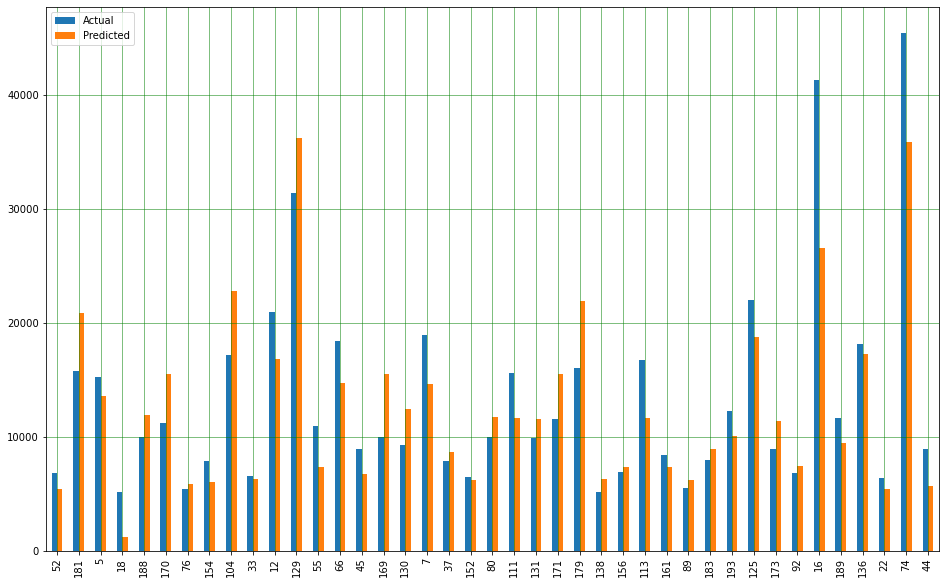

In [28]:
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [29]:
from sklearn import metrics
from sklearn.metrics import r2_score
print("R2 Error:", metrics.r2_score(y_test, y_pred_test1))

R2 Error: 0.7844911526949768


## Final model should be interpretable-What is your understanding of the factors that drive price?

All the features which are considered (which may drive the price) are related to the overall car performance. For ex-symboling tells the overall safety of the car. Thus the company invests more into these features affecting the overall price of the car.